# Applying Boundary Box

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

# Define the input and output directories
input_dir = '/kaggle/input/figshare-brain-tumor-dataset/dataset/data/'
output_dir = '/kaggle/working/boundary_dataset/'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

In [2]:
# Function to process and save images with tumor border overlay
def process_and_save_image(file_path, output_dir):
    with h5py.File(file_path, 'r') as mat_file:
        cjdata_group = mat_file['cjdata']
        image_data = cjdata_group['image'][:]
        tumor_mask = cjdata_group['tumorMask'][:]
        tumor_border = cjdata_group['tumorBorder'][0]
        x_coordinates = tumor_border[0::2]
        y_coordinates = tumor_border[1::2]
        
        x_coordinates_mirror = np.flipud(x_coordinates)
        y_coordinates_mirror = np.flipud(y_coordinates)
        
        # Plot the MRI image with tumor border overlay
        fig, ax = plt.subplots()
        
        ax.imshow(image_data, cmap='gray')
        ax.imshow(tumor_mask, cmap='hot', alpha=0.3)
        ax.plot(y_coordinates_mirror, x_coordinates_mirror, 'r', linewidth=2)
        ax.axis('off')
        
        # Save the plot to the output directory
        base_filename = os.path.basename(file_path).replace('.mat', '')
        output_filename = os.path.join(output_dir, f'{base_filename}_boundary.png')
        fig.savefig(output_filename, bbox_inches='tight', pad_inches=0)
        plt.close(fig)


In [3]:
# Get a list of all .mat files in the input directory
mat_files = glob.glob(os.path.join(input_dir, '*.mat'))

# Process each file
for mat_file in mat_files:
    process_and_save_image(mat_file, output_dir)

print(f"Processed and saved {len(mat_files)} images with tumor boundaries to {output_dir}")

Processed and saved 3064 images with tumor boundaries to /kaggle/working/boundary_dataset/


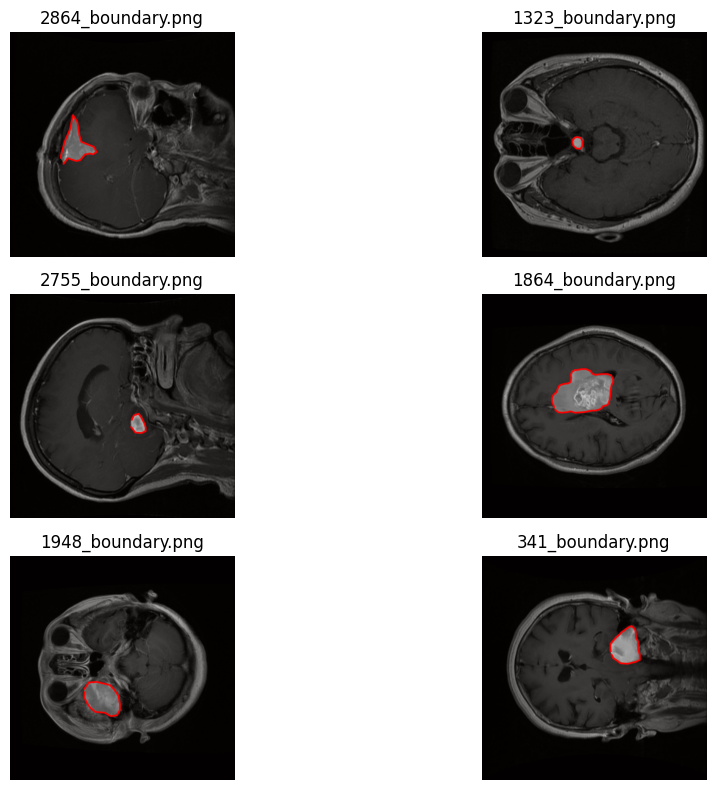

In [4]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the directory containing the images
image_directory = '/kaggle/working/boundary_dataset'

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(image_directory) if f.endswith('.png')]

# Select 6 random images from the directory
random_images = random.sample(image_files, 6)

# Create a 3x2 grid to display the images
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Iterate over the selected images and display each one in the grid
for ax, image_file in zip(axes.flat, random_images):
    # Load the image
    img_path = os.path.join(image_directory, image_file)
    img = mpimg.imread(img_path)
    
    # Display the image
    ax.imshow(img)
    ax.axis('off')  # Turn off axis
    ax.set_title(image_file)  # Set the title to the image file name

# Adjust layout and display the grid
plt.tight_layout()
plt.show()

# Comparing Mask

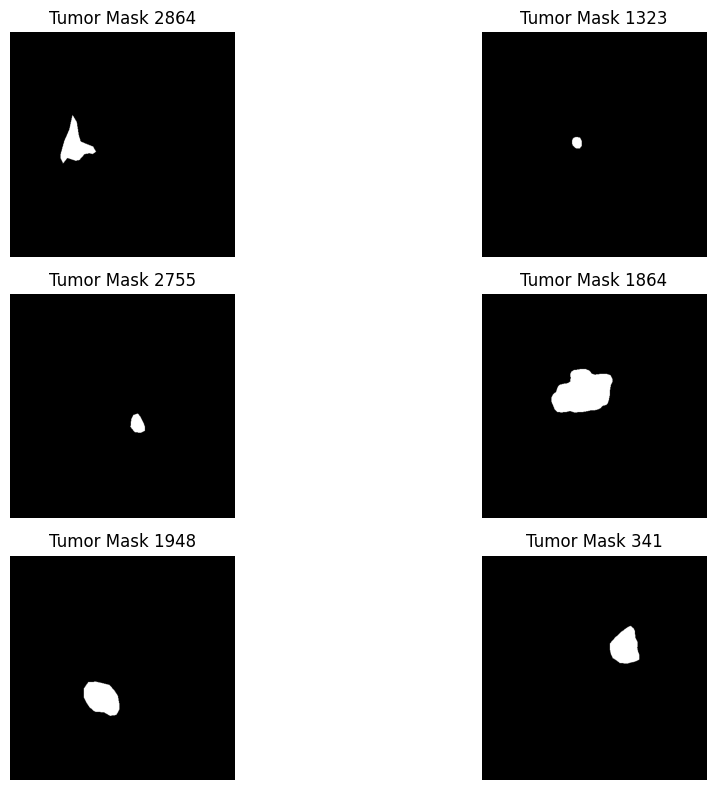

In [5]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# List of file IDs to be processed
file_ids = [2864, 1323, 2755, 1864, 1948, 341]

# Directory containing the .mat files
data_directory = '/kaggle/input/figshare-brain-tumor-dataset/dataset/data'

# Function to load tumor mask from a .mat file
def load_tumor_mask(file_id):
    file_path = os.path.join(data_directory, f'{file_id}.mat')
    with h5py.File(file_path, 'r') as f:
        tumor_mask = np.array(f['cjdata']['tumorMask'])
    return tumor_mask

# Create a 3x2 grid to display the images
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Iterate over the file IDs and display each tumor mask in the grid
for ax, file_id in zip(axes.flat, file_ids):
    # Load the tumor mask
    tumor_mask = load_tumor_mask(file_id)
    
    # Display the tumor mask
    ax.imshow(tumor_mask, cmap='gray')
    ax.axis('off')  # Turn off axis
    ax.set_title(f'Tumor Mask {file_id}')  # Set the title to the file ID

# Adjust layout and display the grid
plt.tight_layout()
plt.show()

# Thresholding

In [6]:
import os
import cv2
import numpy as np
import imageio

# Define the directories
input_directory = '/kaggle/working/boundary_dataset'
output_directory = '/kaggle/working/boundary_mask'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Get a list of all image files in the input directory
image_files = [f for f in os.listdir(input_directory) if f.endswith('.png')]

In [7]:
# Function to apply thresholding and set all pixels inside the boundary to 1
def apply_threshold(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply thresholding
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    
    # Find contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create a mask with the same dimensions as the image
    mask = np.zeros_like(image)
    
    # Fill the mask with 1s inside the boundary
    cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)
    
    # Set the pixels inside the boundary to 1
    mask[mask == 255] = 1
    
    return mask

In [8]:
# Process each image and save the modified images to the output directory
for image_file in image_files:
    input_path = os.path.join(input_directory, image_file)
    output_path = os.path.join(output_directory, image_file)
    
    # Apply thresholding and get the mask
    mask = apply_threshold(input_path)
    
    # Save the mask
    imageio.imwrite(output_path, mask)

print("All images processed and saved to:", output_directory)

All images processed and saved to: /kaggle/working/boundary_mask


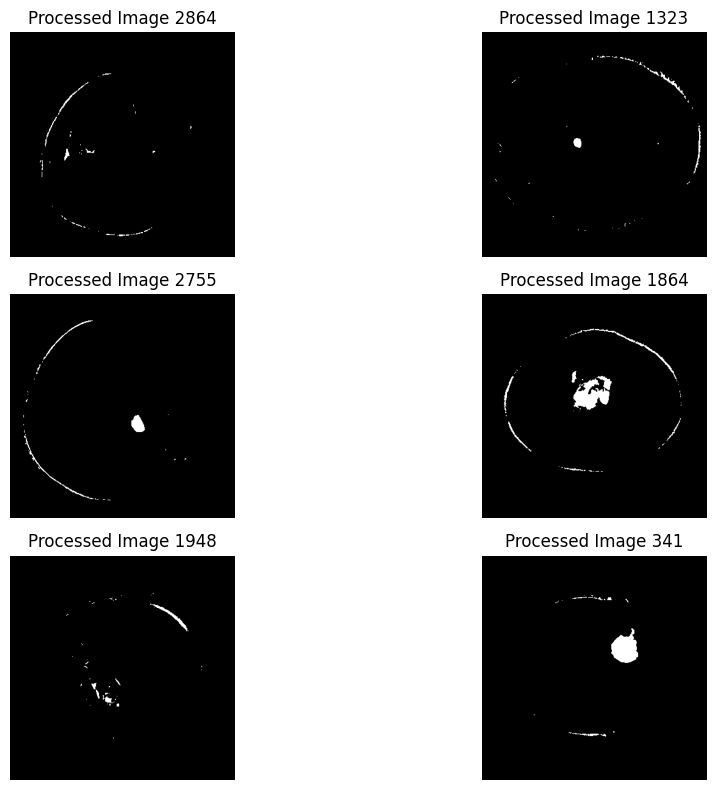

In [10]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the directory containing the processed images
output_directory = '/kaggle/working/boundary_mask'

# List of file IDs to be displayed
file_ids = [2864, 1323, 2755, 1864, 1948, 341]

# Create a 3x2 grid to display the images
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Iterate over the file IDs and display each processed image in the grid
for ax, file_id in zip(axes.flat, file_ids):
    # Load the processed image
    image_path = os.path.join(output_directory, f'{file_id}_boundary.png')
    img = mpimg.imread(image_path)
    
    # Display the image
    ax.imshow(img, cmap='gray')
    ax.axis('off')  # Turn off axis
    ax.set_title(f'Processed Image {file_id}')  # Set the title to the file ID

# Adjust layout and display the grid
plt.tight_layout()
plt.show()

# Contour

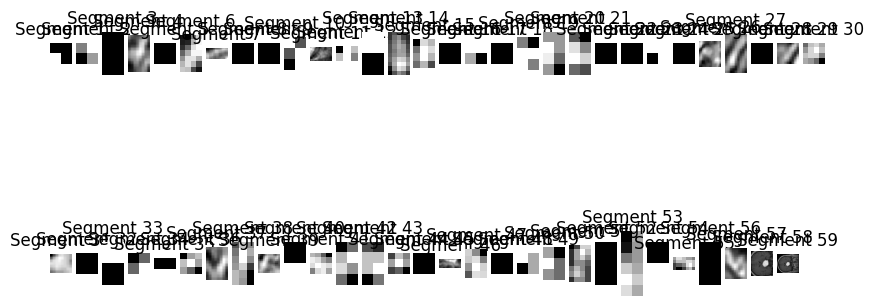

<Figure size 640x480 with 0 Axes>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# Load the image
image_path = '/kaggle/working/boundary_dataset/1543_boundary.png'
image = Image.open(image_path)

# Convert the image to grayscale
gray_image = image.convert('L')

# Convert the grayscale image to a numpy array
gray_array = np.array(gray_image)

# Step 1: Thresholding
_, binary_image = cv2.threshold(gray_array, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Step 2: Contour Detection
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 3: Region Extraction
segmented_regions = []
for contour in contours:
    # Calculate the bounding box of the contour
    x, y, w, h = cv2.boundingRect(contour)
    # Extract the region of interest from the original image
    segmented_region = gray_array[y:y+h, x:x+w]
    segmented_regions.append(segmented_region)

# Display the segmented regions
num_regions = len(segmented_regions)
rows = 2
cols = (num_regions + 1) // rows
plt.figure(figsize=(10, 5))
for i, region in enumerate(segmented_regions):
    plt.subplot(rows, cols, i+1)
    plt.imshow(region, cmap='gray')
    plt.title(f'Segment {i+1}')
    plt.axis('off')

plt.show()
plt.tight_layout()

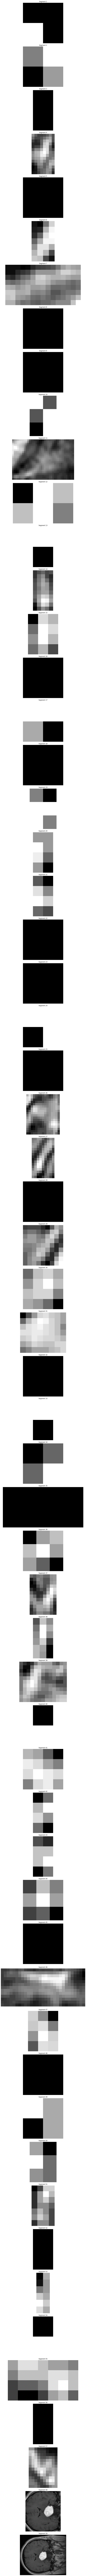

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# Load the image
image_path = '/kaggle/working/boundary_dataset/1543_boundary.png'
image = Image.open(image_path)

# Convert the image to grayscale
gray_image = image.convert('L')

# Convert the grayscale image to a numpy array
gray_array = np.array(gray_image)

# Step 1: Thresholding
_, binary_image = cv2.threshold(gray_array, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Step 2: Contour Detection
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 3: Region Extraction
segmented_regions = []
for contour in contours:
    # Calculate the bounding box of the contour
    x, y, w, h = cv2.boundingRect(contour)
    # Extract the region of interest from the original image
    segmented_region = gray_array[y:y+h, x:x+w]
    segmented_regions.append(segmented_region)

# Display the segmented regions
num_regions = len(segmented_regions)
plt.figure(figsize=(10, 5 * num_regions))
for i, region in enumerate(segmented_regions):
    plt.subplot(num_regions, 1, i+1)
    plt.imshow(region, cmap='gray')
    plt.title(f'Segment {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()